# Exercise 7 - Unsupervised machine learning

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [222]:
# Importing the dataset from the last exercise
import pandas as pd
from IPython.display import display, HTML

X, y = md.loc[:, md.columns !='edibility'], md.loc[:, md.columns == 'edibility']

X_dum = pd.get_dummies(X)
y_dum = pd.get_dummies(y)
y_dum.drop(columns='edibility_p', axis=1, inplace=True)
X_dum.describe()
y_dum.head()

,edibility_e
0,0
1,1
2,1
3,0
4,1


In [223]:
# Using the UCI Mushroom dataset, use k-means and a suitable cluster 
# evaluation metric to determine the optimal number of clusters in the dataset. 
# Note that this may not necessarily be two (edible versus not-edible).
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

ssd = []
K = range(2, 30)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_dum)
    ssd.append(kmeans.inertia_)
# y_kmeans = kmeans.predict(X_dum)

Optimal k around k=~9-10


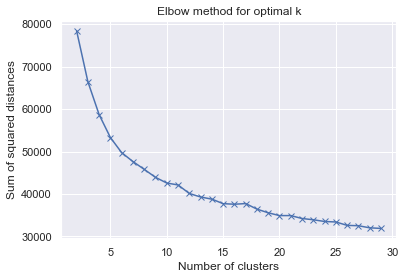

In [224]:
# Plot this metric while increasing the number of clusters, e.g., 𝑘=2..30
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k')
plt.show
print("Optimal k around k=~10")

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30]
Computing adjusted_rand_score for 29 values of n_clusters and n_samples=8124
adjusted_rand_score :  0 | 2
adjusted_rand_score :  10 | 12
adjusted_rand_score :  20 | 22
Computing v_measure_score for 29 values of n_clusters and n_samples=8124
v_measure_score :  0 | 2
v_measure_score :  10 | 12
v_measure_score :  20 | 22
Computing adjusted_mutual_info_score for 29 values of n_clusters and n_samples=8124
adjusted_mutual_info_score :  0 | 2
adjusted_mutual_info_score :  10 | 12
adjusted_mutual_info_score :  20 | 22
Computing mutual_info_score for 29 values of n_clusters and n_samples=8124
mutual_info_score :  0 | 2
mutual_info_score :  10 | 12
mutual_info_score :  20 | 22
As one would expect, the score increases with a higher number of clusters.We can, however, observe that mutual_info doesn't gain too much after k=~10,which concurs with what we found earlier. Although, the other evaluators seemto find

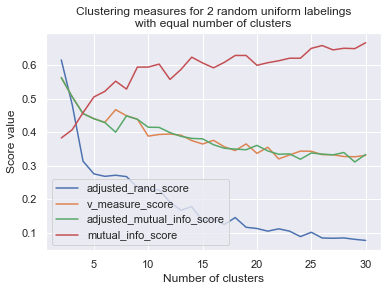

In [225]:
# Plot this metric while increasing the number of clusters, e.g., 𝑘=2..30
from sklearn import metrics

def uniform_labelings_scores(score_func, n_samples, n_clusters_range, 
                             fixed_n_classes=None, n_runs=5, seed=42):
    # random_labels = np.random.RandomState(seed).randint
    scores = np.zeros((len(n_clusters_range), n_runs))
    
    # if fixed_n_classes is not None:
        # labels_a = random_labels(low=0, high=fixed_n_classes, size=n_samples)
    for i, k in enumerate(n_clusters_range):
        if i % 10 == 0:
            print(score_func.__name__, ": ", i, "|", k)
        # print("i", i, "k", k)
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X_dum)
        for j in range(n_runs):
            #if fixed_n_classes is None:
            #    labels_a = y_dum
            labels_a = y_dum.to_numpy().squeeze()
            labels_b = kmeans.predict(X_dum)
            # print(labels_b.shape)
            scores[i, j] = score_func(labels_a,
                                      labels_b)
    return scores

score_funcs = [
    metrics.adjusted_rand_score,
    metrics.v_measure_score,
    metrics.adjusted_mutual_info_score,
    metrics.mutual_info_score,
]


n_samples = len(X_dum)
n_clusters_range = np.linspace(2, 30, 29).astype(int)
print(n_clusters_range)
plt.figure(1)

plots = []
names = []
for score_func in score_funcs:
    print("Computing %s for %d values of n_clusters and n_samples=%d"
          % (score_func.__name__, len(n_clusters_range), n_samples))
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range)
    plots.append(plt.errorbar(
        n_clusters_range, np.median(scores, axis=1), scores.std(axis=1))[0])
    names.append(score_func.__name__)
    
plt.title("Clustering measures for 2 random uniform labelings\nwith equal number of clusters")
plt.xlabel('Number of clusters')
plt.ylabel('Score value')
plt.legend(plots, names)
print("As one would expect, the score increases with a higher number of clusters." +
      "We can, however, observe that mutual_info doesn't gain too much after k=~10," +
      "which concurs with what we found earlier. Although, the other evaluators seem" +
      "to find that k=2 is better.")

(9, 117)
[[ 4.08163265e-03  4.08163265e-03  2.48979592e-01 ... -8.32667268e-17
   1.95918367e-01  1.73472348e-17]
 [ 1.24900090e-16  1.30104261e-18  5.00000000e-01 ...  1.94289029e-16
   5.00000000e-01  4.85722573e-17]
 [ 4.55062571e-03  2.16840434e-18  3.32195677e-01 ...  3.27645051e-01
   1.38777878e-17 -1.24900090e-16]
 ...
 [-1.04083409e-16  2.16840434e-18  5.00000000e-01 ... -1.44328993e-15
   1.38777878e-17 -1.21430643e-16]
 [ 2.50000000e-01  1.08420217e-18  2.50000000e-01 ...  2.77555756e-17
  -1.24900090e-16  3.46944695e-17]
 [ 2.14285714e-01  3.10559006e-03  2.08074534e-01 ...  6.21118012e-02
   5.55111512e-17  2.98136646e-01]]


(-0.05, 0.05)

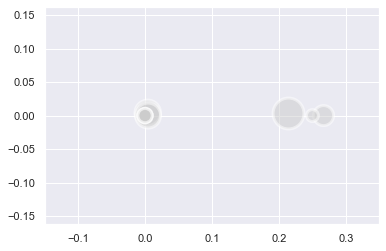

In [213]:
# Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.
## TODO Weird plots due to small center co-ords etc.
import seaborn as sns; sns.set()
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    # ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    print(centers.shape)
    print(centers)
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r*0.005, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

kmeans = KMeans(n_clusters=9)
plot_kmeans(kmeans, X_dum)
plt.xlim(-0.15, 0.35)
plt.ylim(-0.05, 0.05)

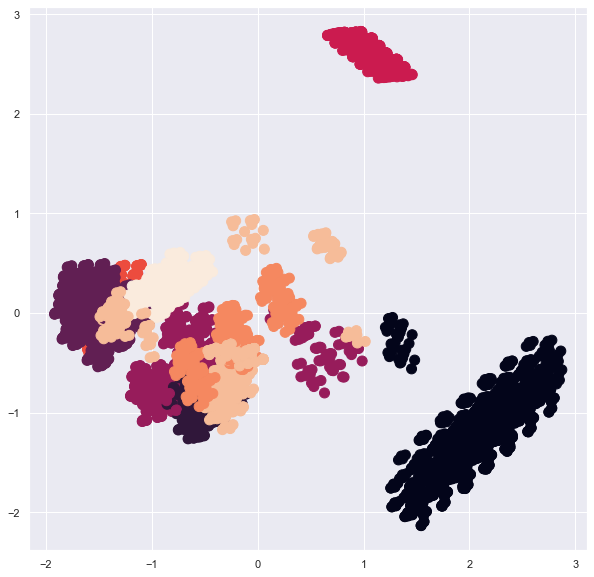

In [252]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pca.fit_transform(X_dum)

kmeans = KMeans(n_clusters=9)
y_kmeans = kmeans.fit_predict(X_dum)

figure, axs = plt.subplots(1, 1)
figure.set_figheight(10)
figure.set_figwidth(10)


axs.scatter(df_pca[:,0], df_pca[:, 1], c=y_kmeans, s=100)

<ipython-input-214-f1a51c0ec8dc>:14: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * np.sqrt(covariance)


ValueError: too many values to unpack (expected 2)

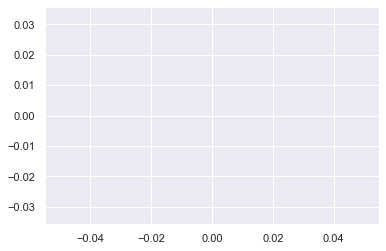

In [214]:
# Attempt at GMM, not functional
from sklearn import mixture

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    # if label:
        # ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    # else:
        # ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

gmm = mixture.GaussianMixture(n_components=9, covariance_type='full', random_state=42)
plot_gmm(gmm, X_dum)
